In [8]:
import tensorflow as tf
import pandas as pd
from pathlib import Path
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np
import gc

# Reading Audio Data
    
# features = pd.read_csv('Dataframes/var_mean_dict.csv', encoding='latin-1', thousands=',')
features = pd.read_csv('Dataframes/sliceDataframe/var_mean_dict_10000_Samples.csv', encoding='latin-1', thousands=',')
# features = pd.read_csv('Dataframes/ismir04/ismir04_3_sec.csv', encoding='latin-1', thousands=',')
# features = pd.read_csv('Dataframes/ismir04/ismir04_10_sec.csv', encoding='latin-1', thousands=',')
# features = pd.read_csv('Dataframes/ismir04/ismir04_100_sec.csv', encoding='latin-1', thousands=',')

print(features.head(5))

print('done')

   Unnamed: 0  Genre  Energy_Mean  RMSE_Mean  ZCR_Mean  CQT_Mean  \
0           0  Blues    42.006336   0.130295      5498  0.024378   
1           1  Blues    28.860627   0.112494      5840  0.006032   
2           2  Blues    44.372582   0.131844      4781  0.012576   
3           3  Blues    39.969162   0.132396      4643  0.014717   
4           4  Blues    44.813606   0.143477      4699  0.035051   

   Spectral_Contrast_Mean  Chromagram_Mean  Tempo_Mean  STFT_Mean  ...  \
0               20.876659         0.278372  129.199219   0.000074  ...   
1               20.660786         0.275674  123.046875   0.000080  ...   
2               20.529431         0.273605  123.046875   0.000058  ...   
3               20.406874         0.280773  123.046875   0.000039  ...   
4               20.370873         0.273082  123.046875   0.000046  ...   

   MFCCS3  MFCCS4  MFCCS5  MFCCS6  MFCCS7  MFCCS8  MFCCS9  MFCCS10  MFCCS11  \
0     337     114     187      64      44      51      34       43 

In [9]:
# Data proccess methods

def replace_char_list(array_list, old_str, new_str):
    """
    Method that replace a str for all the elements of a list
    """
    row_processed = []
    for x in array_list:
        row_processed.append(x.replace(old_str, new_str))
    return row_processed

def string_list_to_float_list(array_list):
    """
    Method that implements the process of convert a stringList of a pandas dataframe in a floats numpy array
    """
    
    array_list = replace_char(array_list, '[', '')
    array_list = replace_char(array_list, ']', '')
    array_list = replace_char(array_list, '...', '')
    
    column_processed = []
    
    for i in range(0, len(array_list)):
        splited = array_list[i].split()
        float_array = np.asarray(splited).astype(np.float)
        column_processed.append(float_array)
    return column_processed

['Blues' 'Classical' 'Country' 'Disco' 'Hiphop' 'Jazz' 'Metal' 'Pop'
 'Reggae' 'Rock']


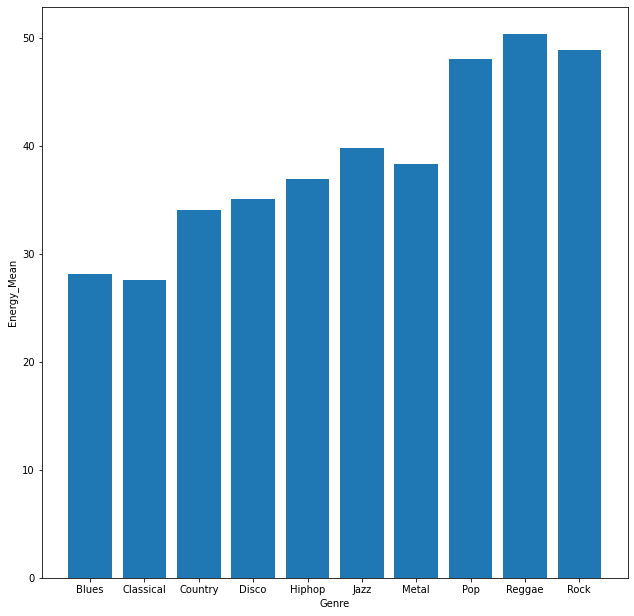

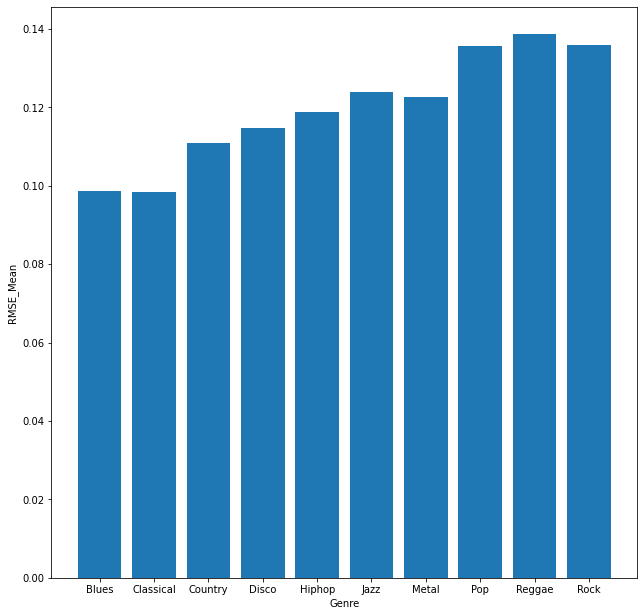

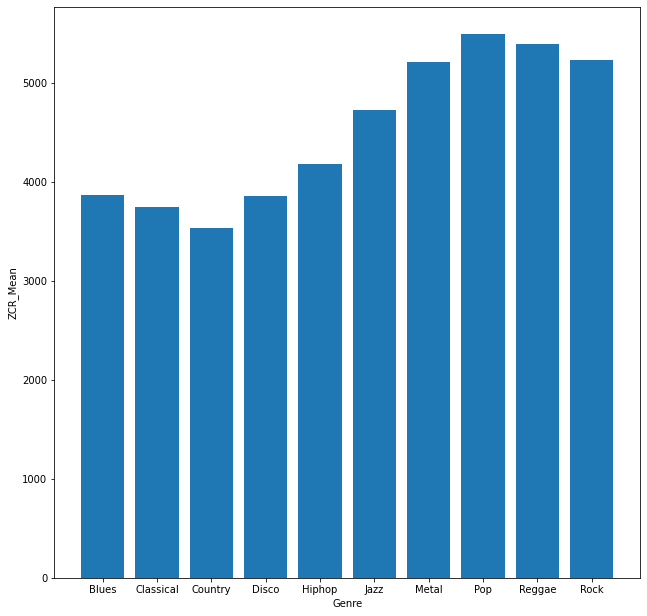

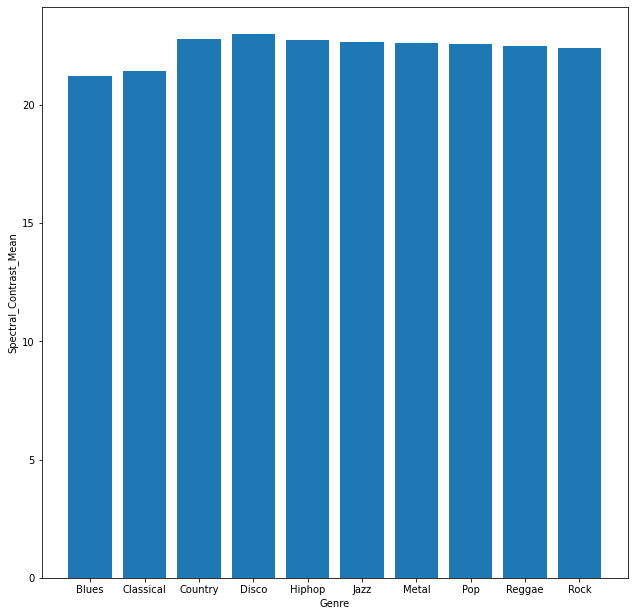

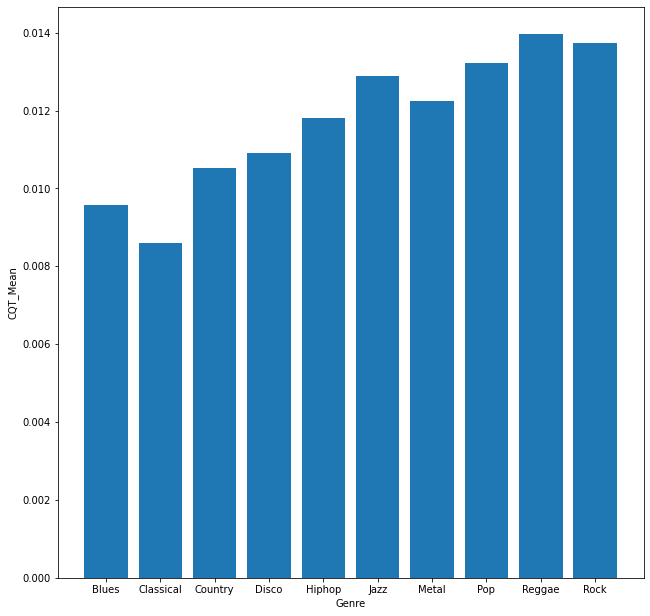

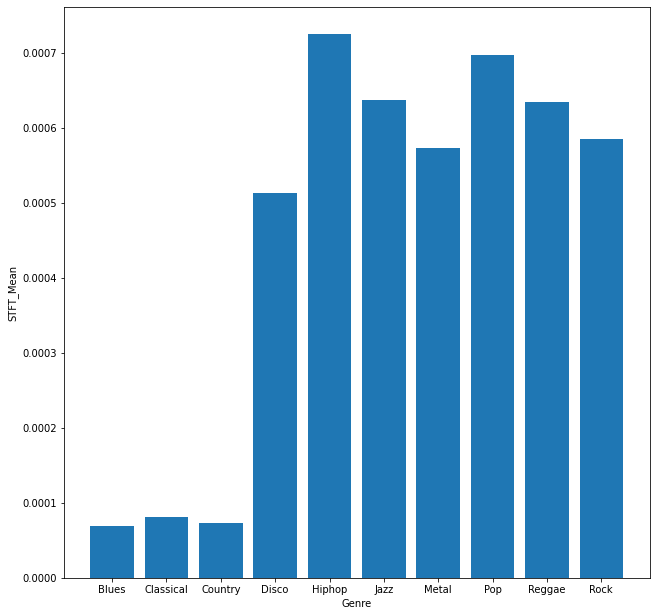

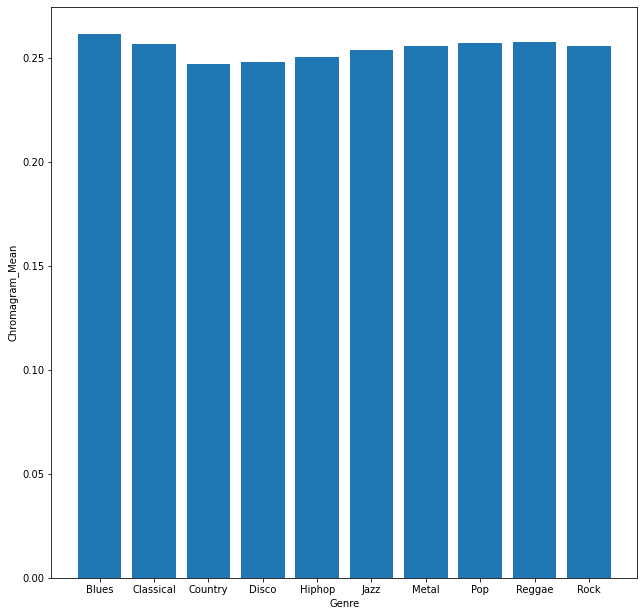

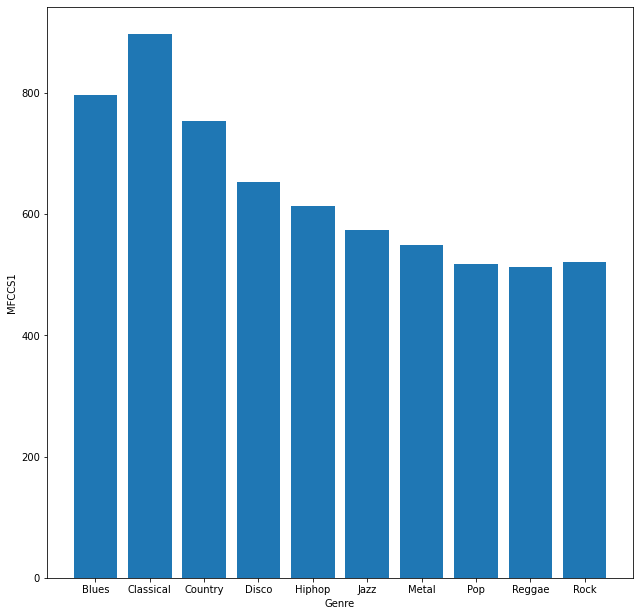

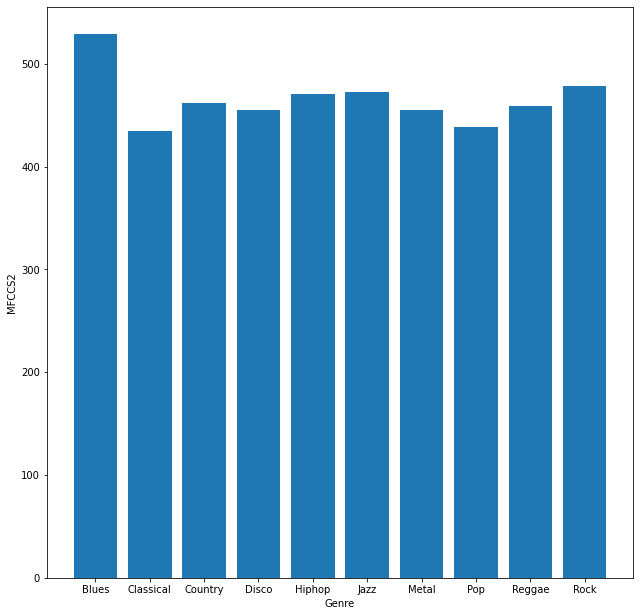

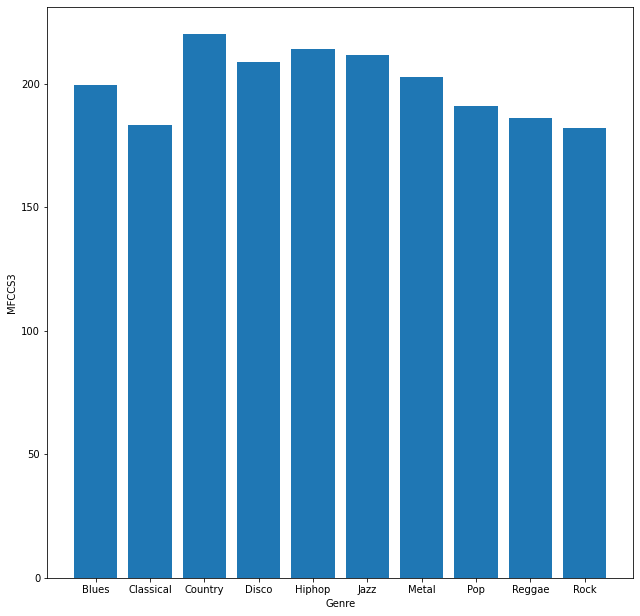

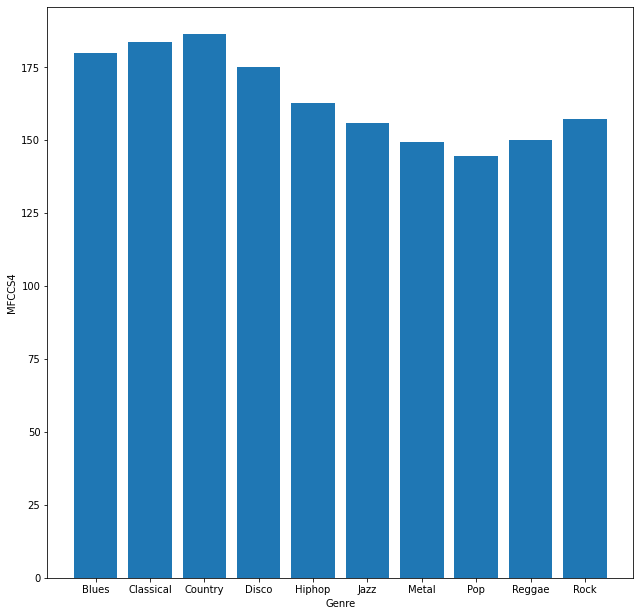

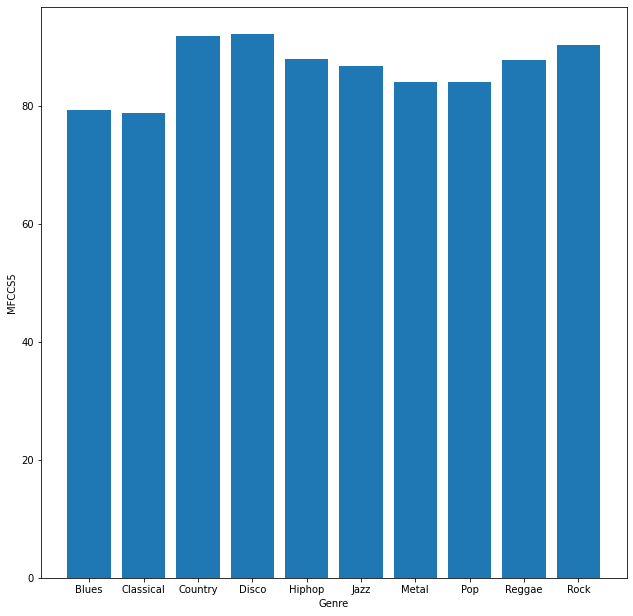

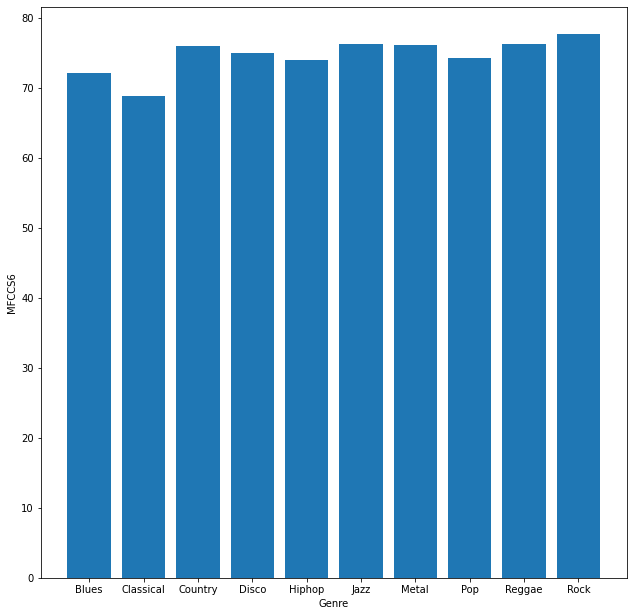

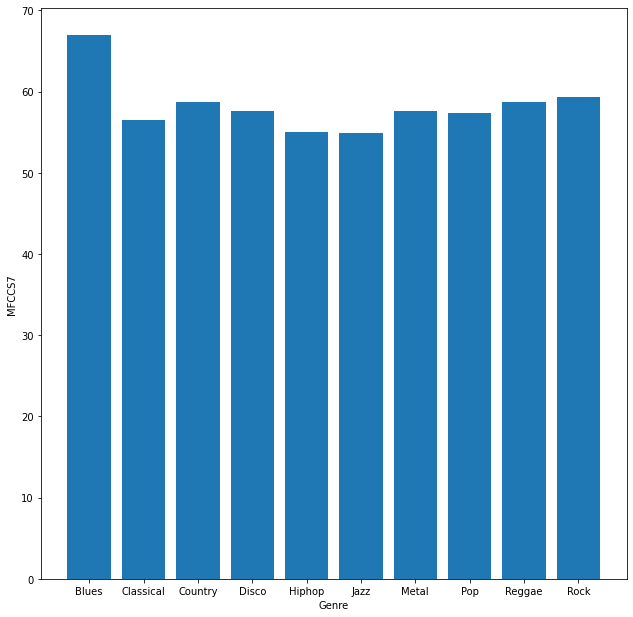

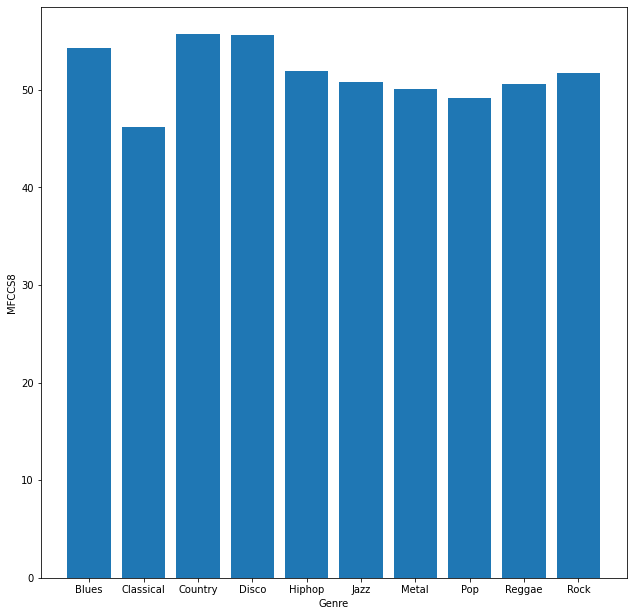

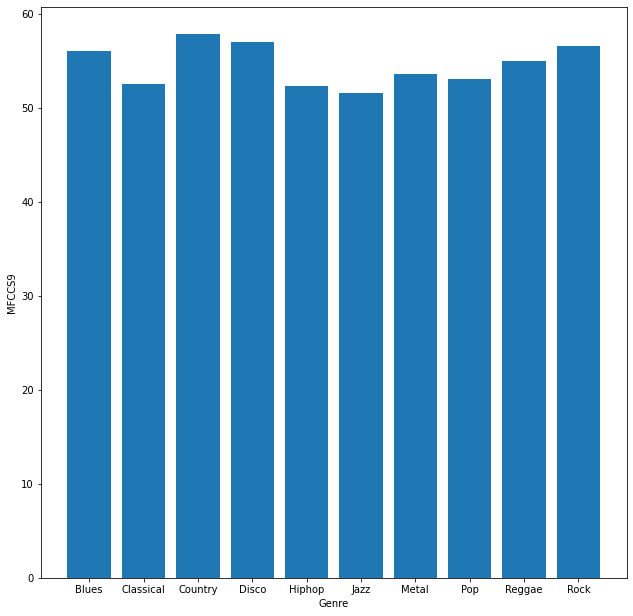

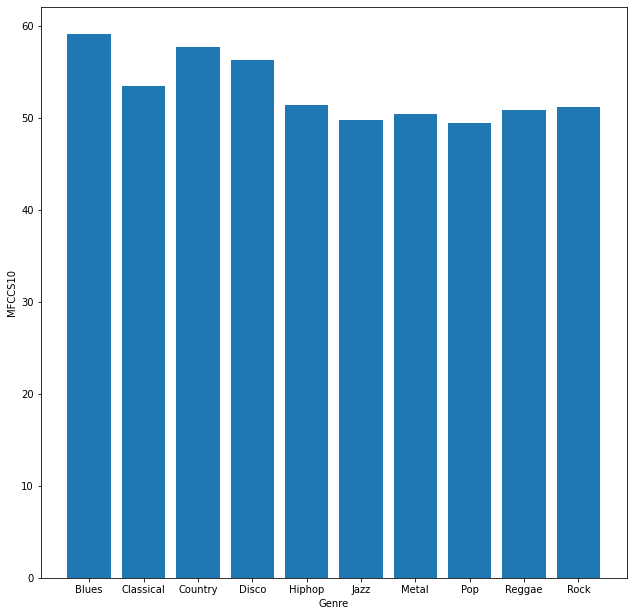

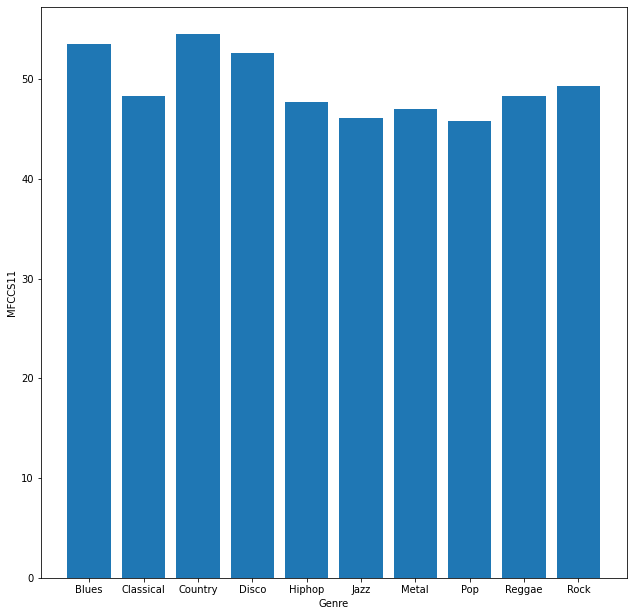

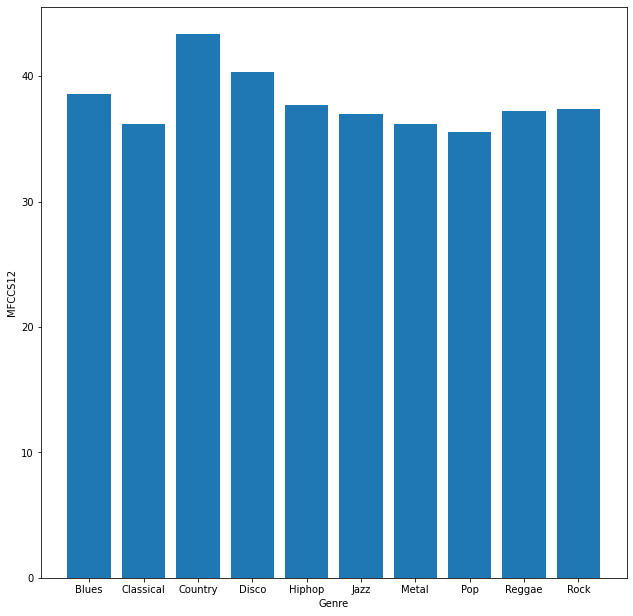

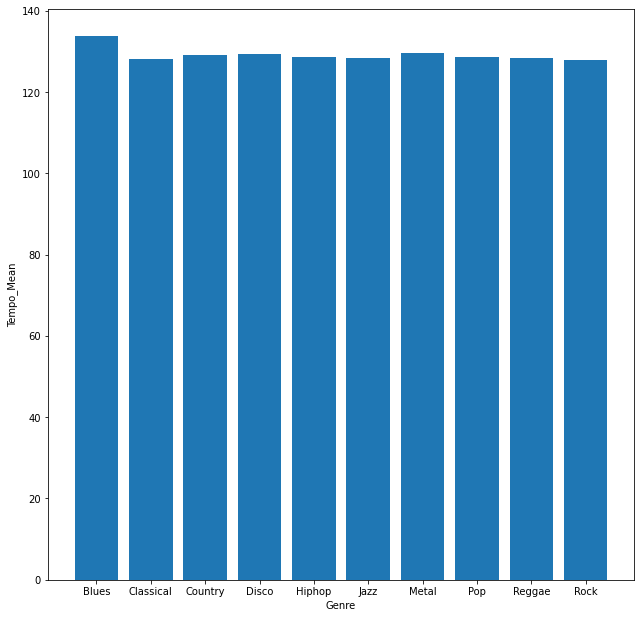

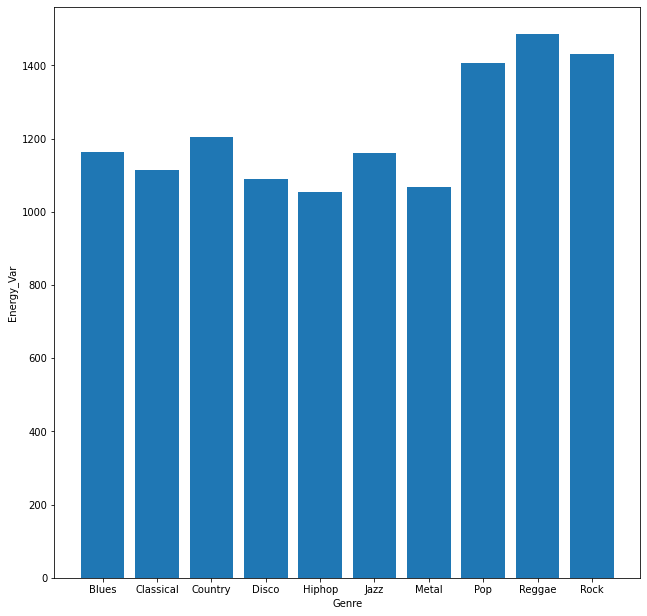

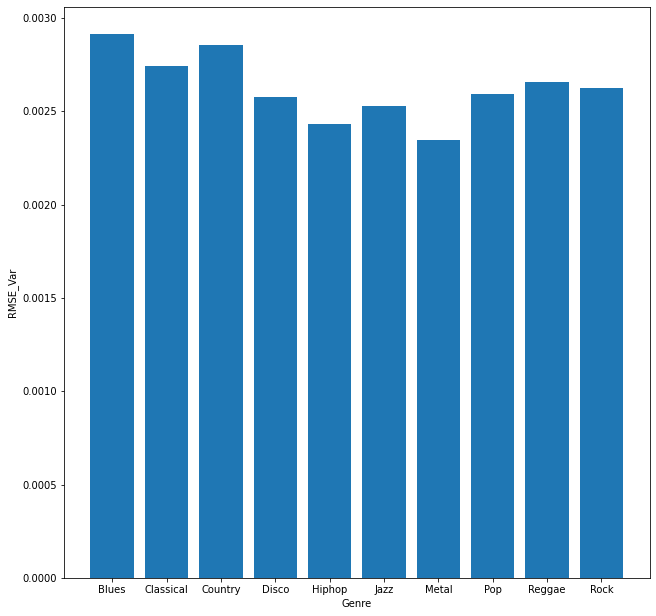

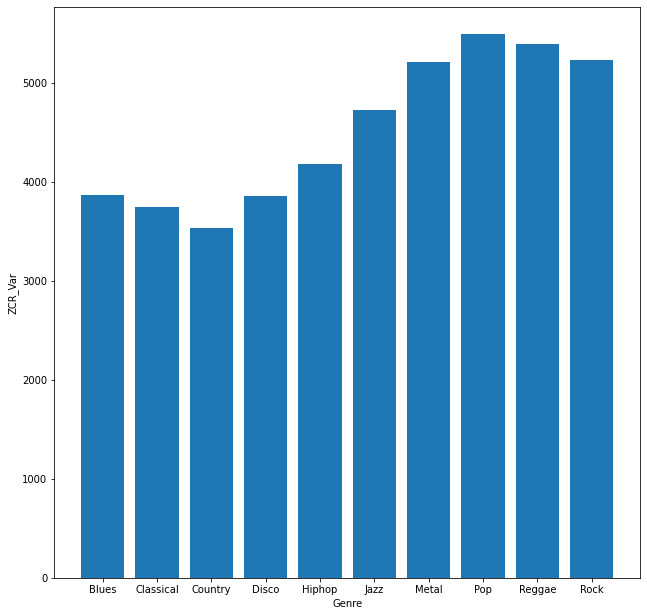

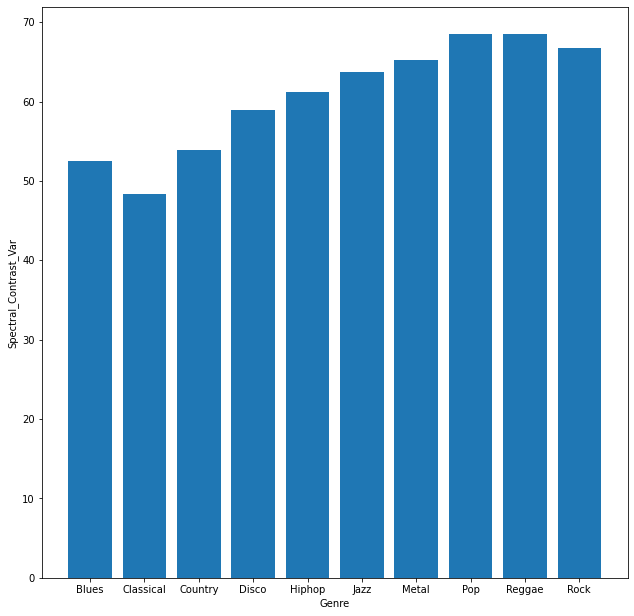

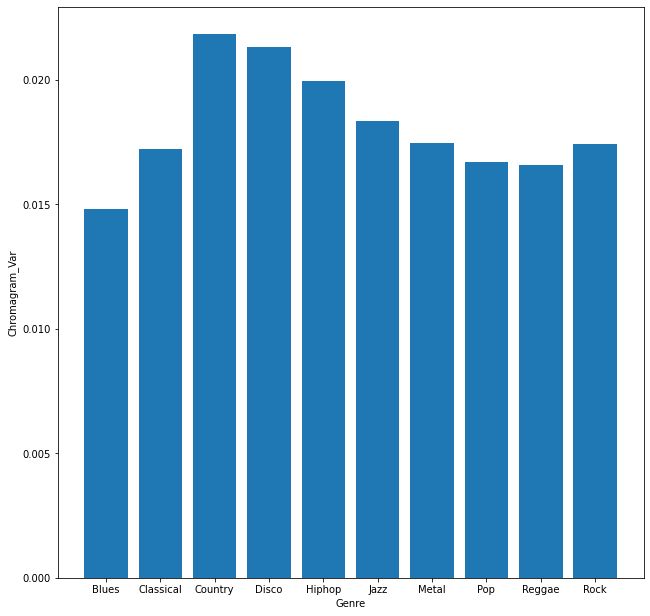

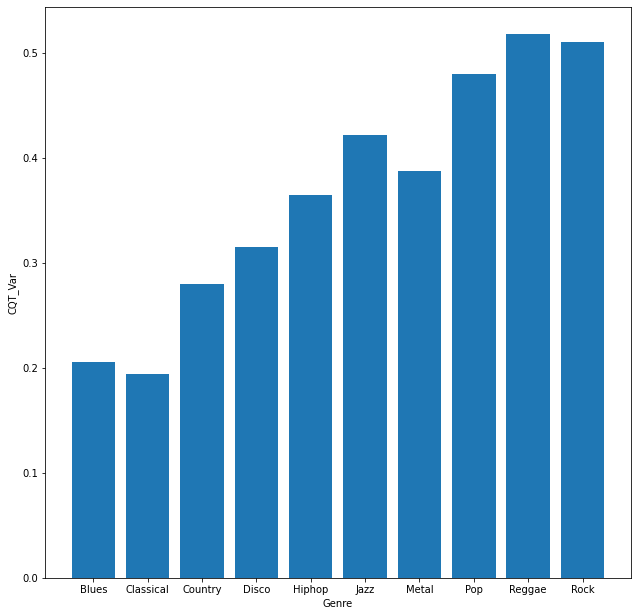

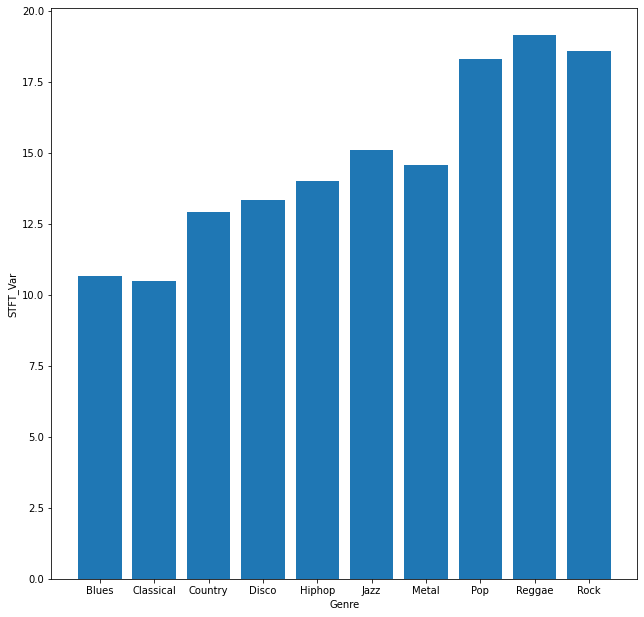

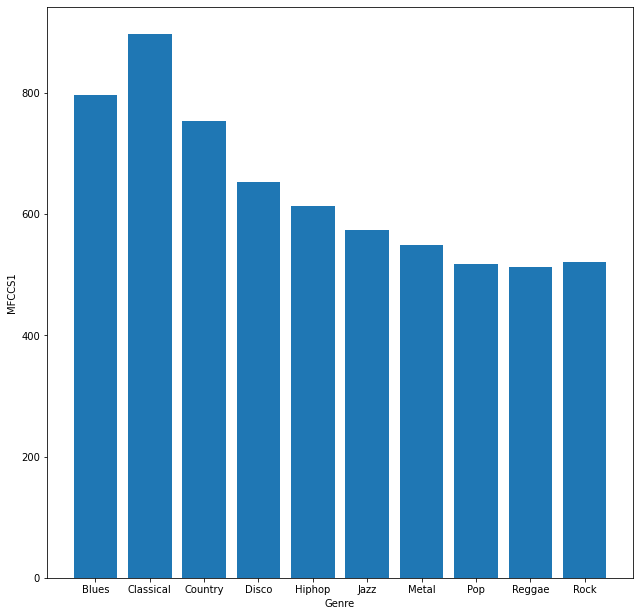

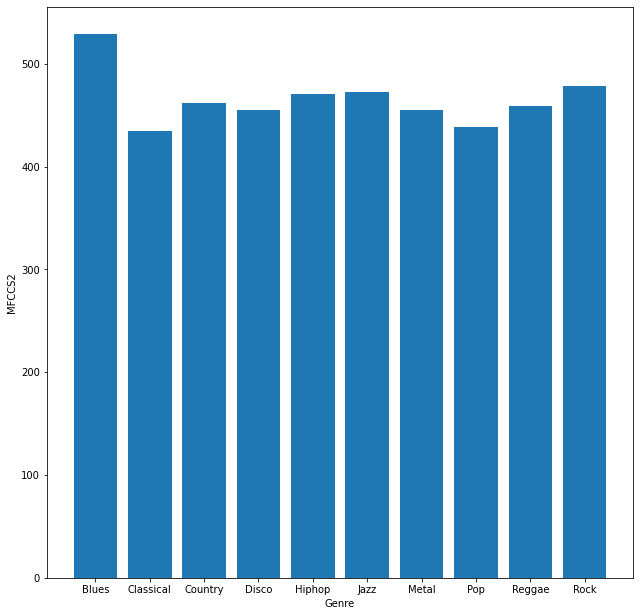

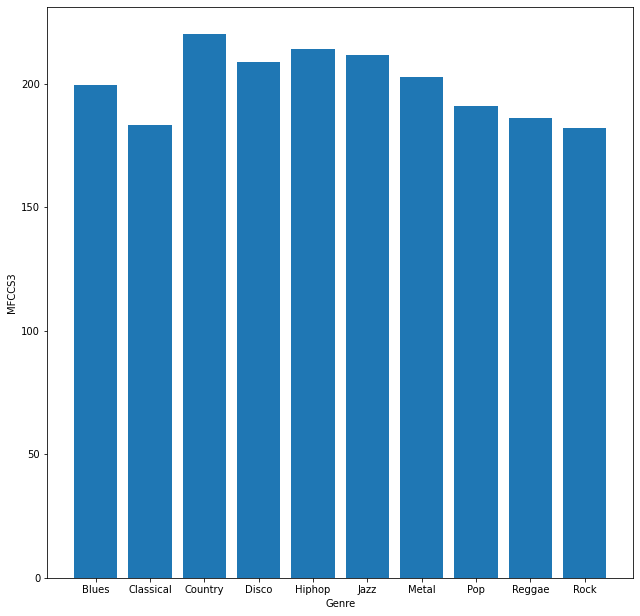

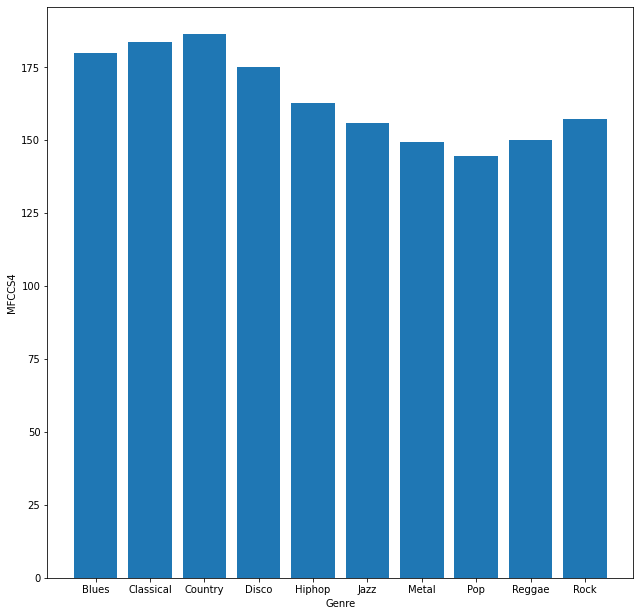

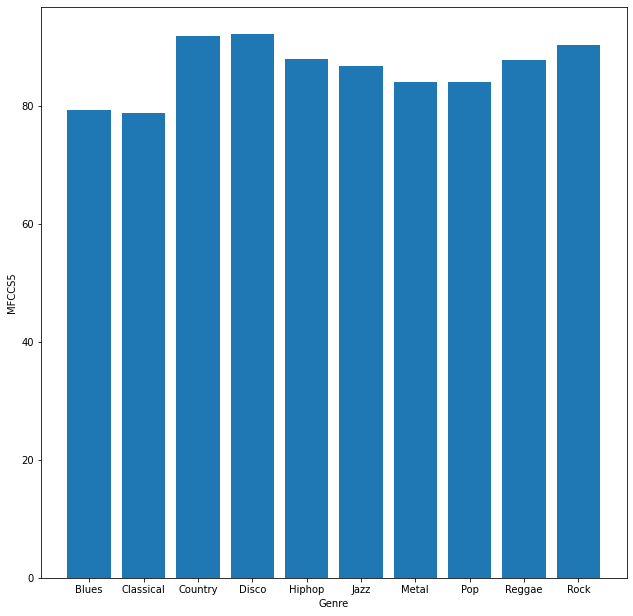

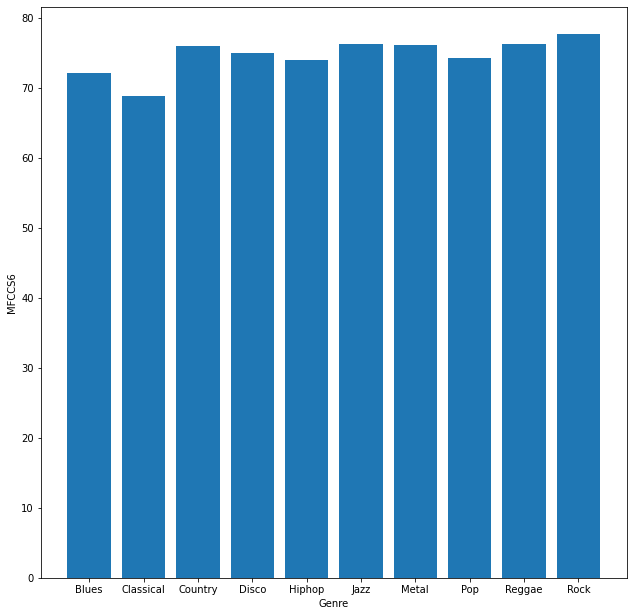

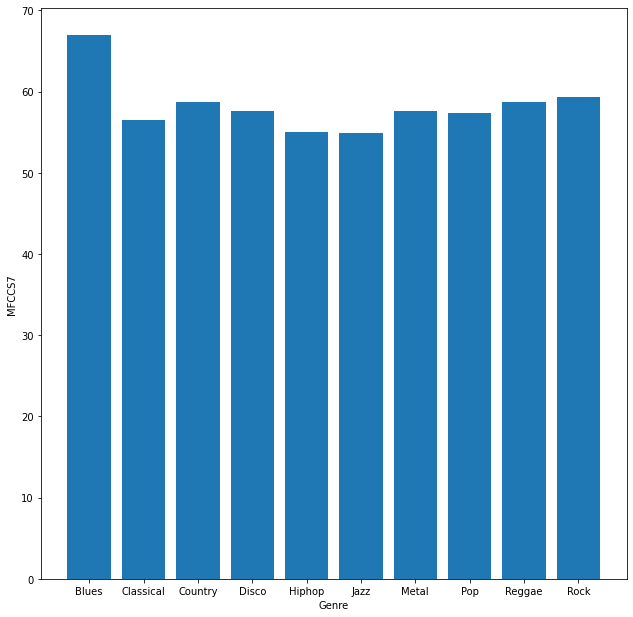

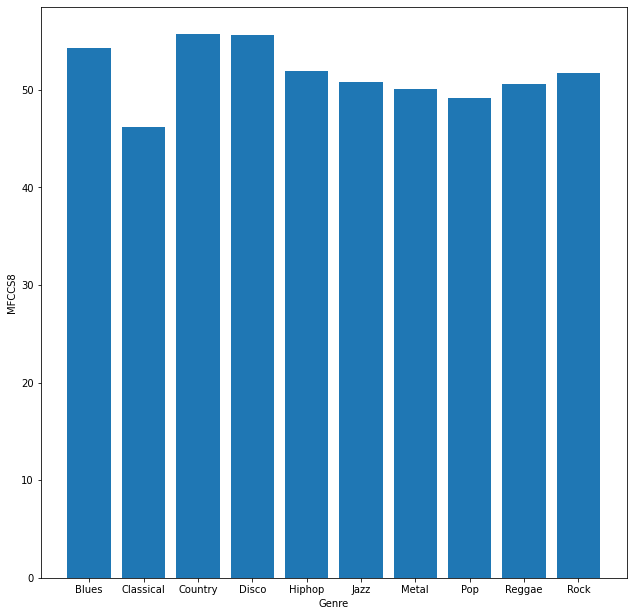

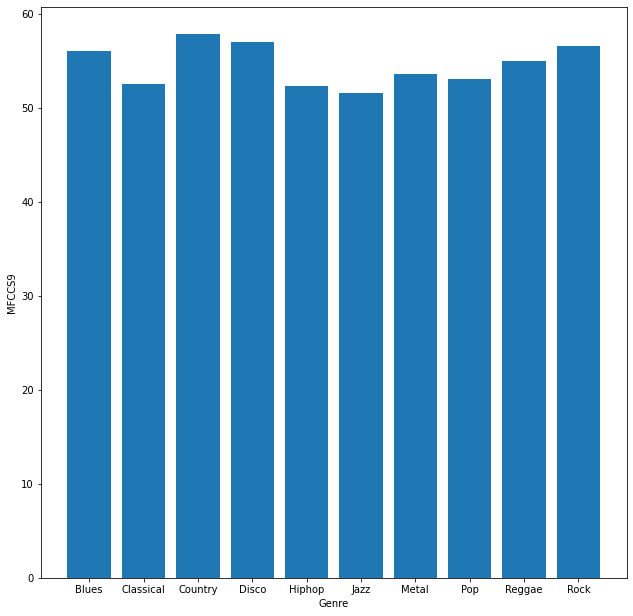

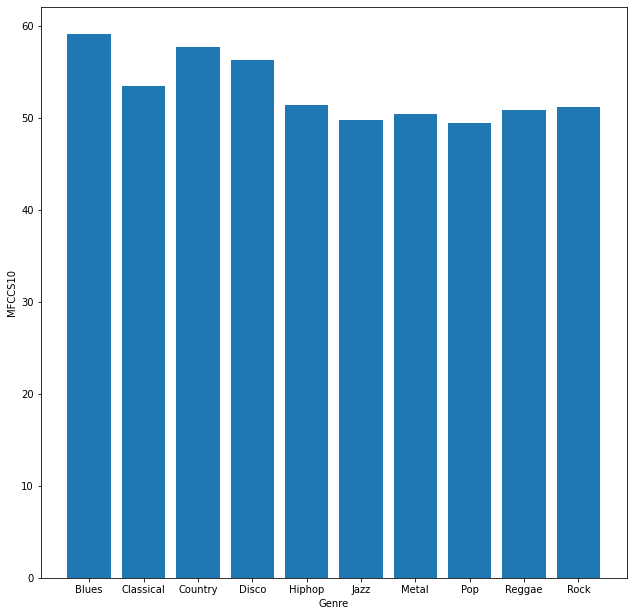

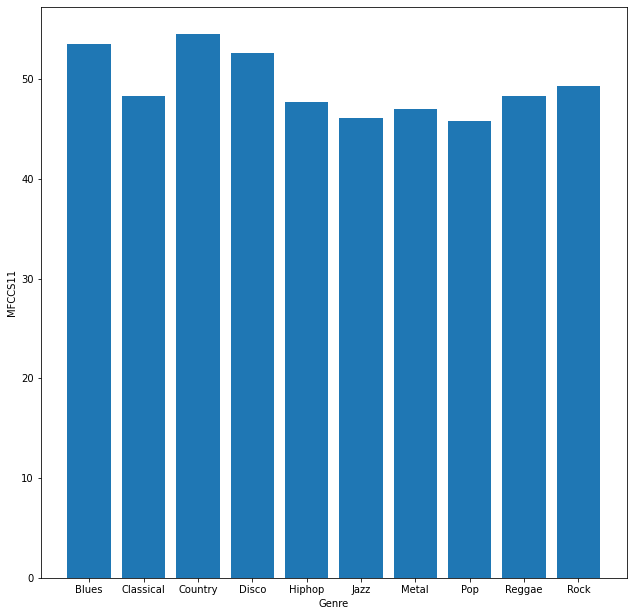

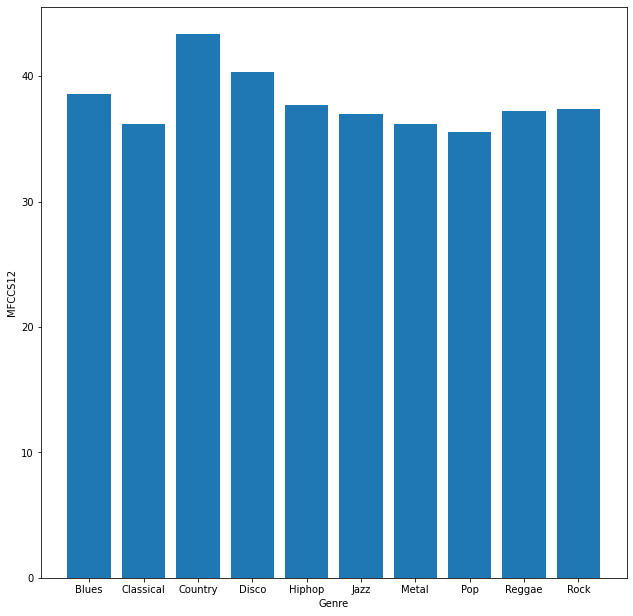

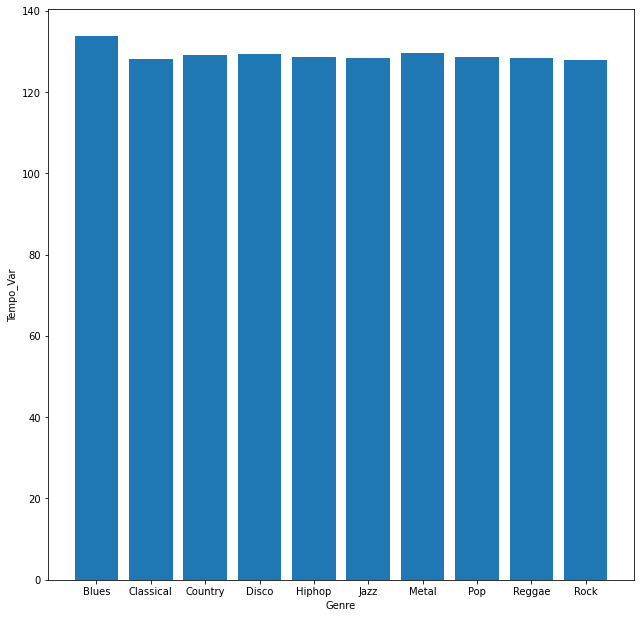

In [10]:
label = 'Genre'
labels = features[label]

print(np.unique(features[label]))

def float_cell_list_to_float_cell_mean (numpy_array_list):
    """
    Convert a columns which cell values are float lists to a column which cell values are the mean of this float lists
    """
    
    column_processed = []
    
    for i in range(0, len(numpy_array_list)):
        cell_mean = numpy_array_list[i].mean()
        column_processed.append(cell_mean)
    return column_processed

def featureMeanBarPlotMaker (features, label_tag, feature_tag, number_features_by_label):
    """
    Method that draw a barPlot of the mean of the given feature against the given label of a given pandas dataframe.
    This method is only usefull if the number of feature by label is constant
    
    features: pandas dataframe
    label_tag: string identifying label
    feature_tag: string identifying feature
    number_features_by_label: number of features for label
    """
    
    features_means = []
    unique_labels = np.unique(features[label_tag])
    for i in range(1, len(unique_labels)+1):
#         features_mean = features[feature_tag][:i*number_features_by_label].mean()
        features_mean = abs(features[feature_tag][:i*number_features_by_label].mean())
        features_means.append(features_mean)
    
    plt.bar(unique_labels, features_means)
    plt.xlabel(label_tag)
    plt.ylabel(feature_tag)
    fig = plt.gcf()
    fig.set_size_inches(10.5, 10.5)
    plt.show()
    
def featureVarBarPlotMaker (features, label_tag, feature_tag, number_features_by_label):
    """
    Method that draw a barPlot of the var of the given feature against the given label of a given pandas dataframe.
    This method is only usefull if the number of feature by label is constant
    
    features: pandas dataframe
    label_tag: string identifying label
    feature_tag: string identifying feature
    number_features_by_label: number of features for label
    """
    
    features_means = []
    unique_labels = np.unique(features[label_tag])
    for i in range(1, len(unique_labels)+1):
#         features_mean = features[feature_tag][:i*number_features_by_label].mean()
        features_mean = abs(features[feature_tag][:i*number_features_by_label].mean())
        features_means.append(features_mean)
    
    plt.bar(unique_labels, features_means)
    plt.xlabel(label_tag)
    plt.ylabel(feature_tag)
    fig = plt.gcf()
    fig.set_size_inches(10.5, 10.5)
    plt.show()
    
    
    
number_features_label = 100

featureMeanBarPlotMaker(features, label, 'Energy_Mean', number_features_label)
featureMeanBarPlotMaker(features, label, 'RMSE_Mean', number_features_label)
featureMeanBarPlotMaker(features, label, 'ZCR_Mean', number_features_label)
featureMeanBarPlotMaker(features, label, 'Spectral_Contrast_Mean', number_features_label)
featureMeanBarPlotMaker(features, label, 'CQT_Mean', number_features_label)
featureMeanBarPlotMaker(features, label, 'STFT_Mean', number_features_label)
featureMeanBarPlotMaker(features, label, 'Chromagram_Mean', number_features_label)
featureMeanBarPlotMaker(features, label, 'MFCCS1', number_features_label)
featureMeanBarPlotMaker(features, label, 'MFCCS2', number_features_label)
featureMeanBarPlotMaker(features, label, 'MFCCS3', number_features_label)
featureMeanBarPlotMaker(features, label, 'MFCCS4', number_features_label)
featureMeanBarPlotMaker(features, label, 'MFCCS5', number_features_label)
featureMeanBarPlotMaker(features, label, 'MFCCS6', number_features_label)
featureMeanBarPlotMaker(features, label, 'MFCCS7', number_features_label)
featureMeanBarPlotMaker(features, label, 'MFCCS8', number_features_label)
featureMeanBarPlotMaker(features, label, 'MFCCS9', number_features_label)
featureMeanBarPlotMaker(features, label, 'MFCCS10', number_features_label)
featureMeanBarPlotMaker(features, label, 'MFCCS11', number_features_label)
featureMeanBarPlotMaker(features, label, 'MFCCS12', number_features_label)
featureMeanBarPlotMaker(features, label, 'Tempo_Mean', number_features_label)



featureVarBarPlotMaker(features, label, 'Energy_Var', number_features_label)
featureVarBarPlotMaker(features, label, 'RMSE_Var', number_features_label)
featureVarBarPlotMaker(features, label, 'ZCR_Var', number_features_label)
featureVarBarPlotMaker(features, label, 'Spectral_Contrast_Var', number_features_label)
featureVarBarPlotMaker(features, label, 'Chromagram_Var', number_features_label)
featureVarBarPlotMaker(features, label, 'CQT_Var', number_features_label)
featureVarBarPlotMaker(features, label, 'STFT_Var', number_features_label)
featureVarBarPlotMaker(features, label, 'MFCCS1', number_features_label)
featureVarBarPlotMaker(features, label, 'MFCCS2', number_features_label)
featureVarBarPlotMaker(features, label, 'MFCCS3', number_features_label)
featureVarBarPlotMaker(features, label, 'MFCCS4', number_features_label)
featureVarBarPlotMaker(features, label, 'MFCCS5', number_features_label)
featureVarBarPlotMaker(features, label, 'MFCCS6', number_features_label)
featureVarBarPlotMaker(features, label, 'MFCCS7', number_features_label)
featureVarBarPlotMaker(features, label, 'MFCCS8', number_features_label)
featureVarBarPlotMaker(features, label, 'MFCCS9', number_features_label)
featureVarBarPlotMaker(features, label, 'MFCCS10', number_features_label)
featureVarBarPlotMaker(features, label, 'MFCCS11', number_features_label)
featureVarBarPlotMaker(features, label, 'MFCCS12', number_features_label)
featureVarBarPlotMaker(features, label, 'Tempo_Var', number_features_label)

In [ ]:
def replace_char(array_list, old_str, new_str):
    row_processed = []
    for x in array_list:
        row_processed.append(x.replace(old_str, new_str))
    return row_processed

def string_list_to_float_list(array_list):
    array_list = replace_char(array_list, '[[', '')
    array_list = replace_char(array_list, ']]', '')
    array_list = replace_char(array_list, '...', '')
    
    splited = array_list[0].split()
    print(splited)
    float_array = np.asarray(splited).astype(np.float)
    return float_array
    
array = string_list_to_float_list(features['Spectral_Contrast'])

print(array.mean())